<a href="https://colab.research.google.com/github/jianzhiw/Machine-Learning/blob/master/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree #


## Regression Tree and Classification Tree ##

Classification trees, as the name implies are used to separate the dataset into classes belonging to the response variable. Usually the response variable has two classes: Yes or No (1 or 0).
<br></br>
Regression trees are needed when the response variable is numeric or continuous. For example, the predicted price of a consumer good. Thus regression trees are applicable for prediction type of problems as opposed to classification.

![Decision Treet](https://www.simafore.com/hs-fs/hub/64283/file-15493460-png/images/which-type-of-decision-tree-to-use.png?width=531&height=442&name=which-type-of-decision-tree-to-use.png)

## Bagging, Random Forest and Boosting ##

Bagging (Bootstrap Aggregation) is used when our goal is to reduce the variance of a decision tree.
<br></br>
Random Forest is an extension over bagging. It takes one extra step where in addition to taking the random subset of data, it also takes the random selection of features rather than using all features to grow trees. When you have many random trees. It’s called Random Forest.
<br></br>
Boosting is another ensemble technique to create a collection of predictors. In this technique, learners are learned sequentially with early learners fitting simple models to the data and then analyzing data for errors. In other words, we fit consecutive trees (random sample) and at every step, the goal is to solve for net error from the prior tree.
<br></br>
Gradient Boosting is an extension over boosting method.

$ Gradient Boosting= Gradient Descent + Boosting. $

It uses gradient descent algorithm which can optimize any differentiable loss function. An ensemble of trees are built one by one and individual trees are summed sequentially. Next tree tries to recover the loss (difference between actual and predicted values).

# Dataset #

The dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra). The dataset is relatively small, with 116 instances and 10 attributes. The output is either 1(Healthy Control) or 2(Patients).

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv

--2019-08-07 01:14:57--  https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7665 (7.5K) [application/x-httpd-php]
Saving to: ‘dataR2.csv’

dataR2.csv          100%[===================>]   7.49K  --.-KB/s    in 0s      

2019-08-07 01:14:58 (145 MB/s) - ‘dataR2.csv’ saved [7665/7665]



# Descriptive Analysis #

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
DATAPATH = 'dataR2.csv'

data = pd.read_csv(DATAPATH)
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


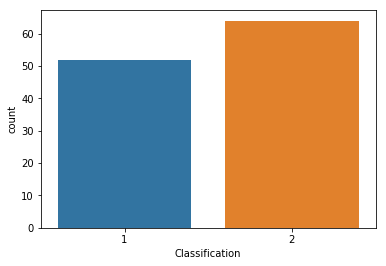

In [4]:
x = data['Classification']

ax = sns.countplot(x=x, data=data)

Now, it would be interesting to see the distribution and density of each feature for healthy people and patients. To do so, a violin plot is ideal. It shows both the density and distribution of a feature in a single plot. Let’s have nine violin plots: one for each feature:

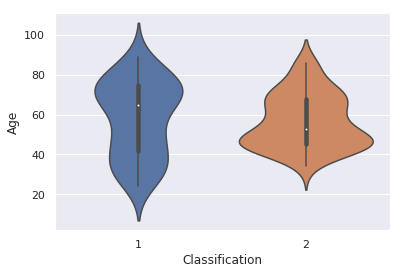

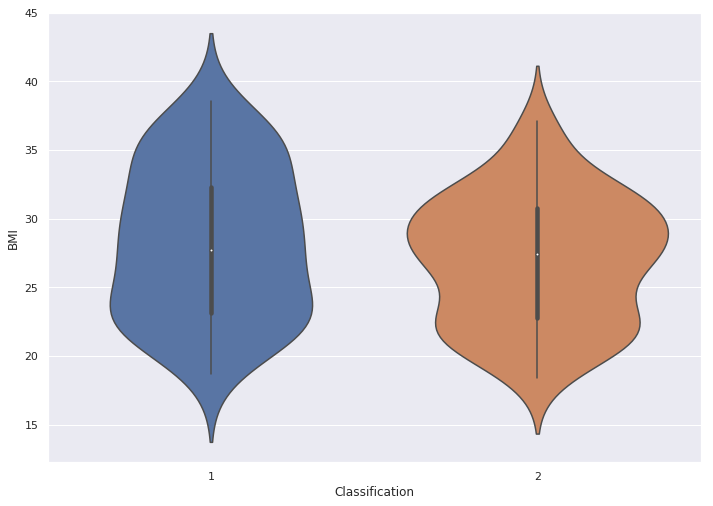

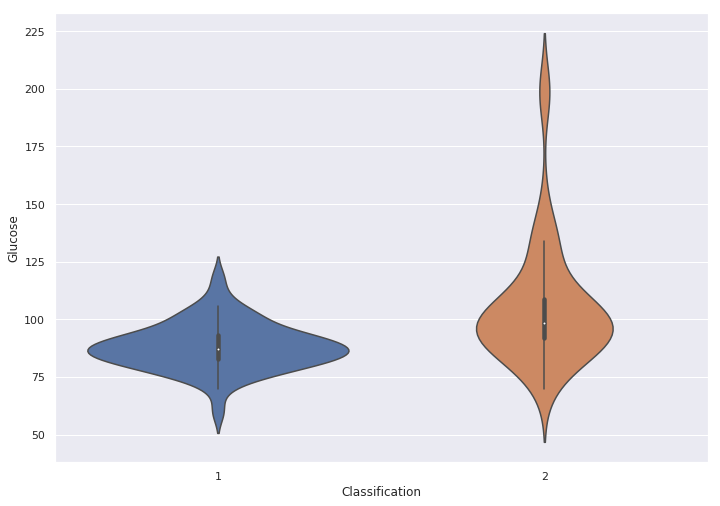

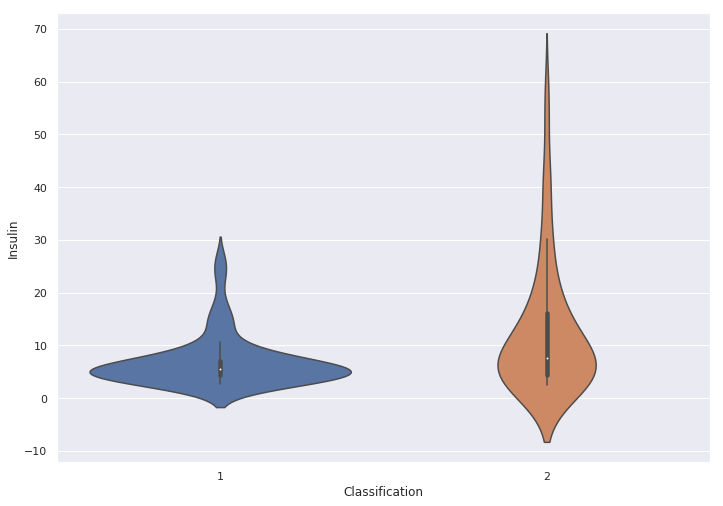

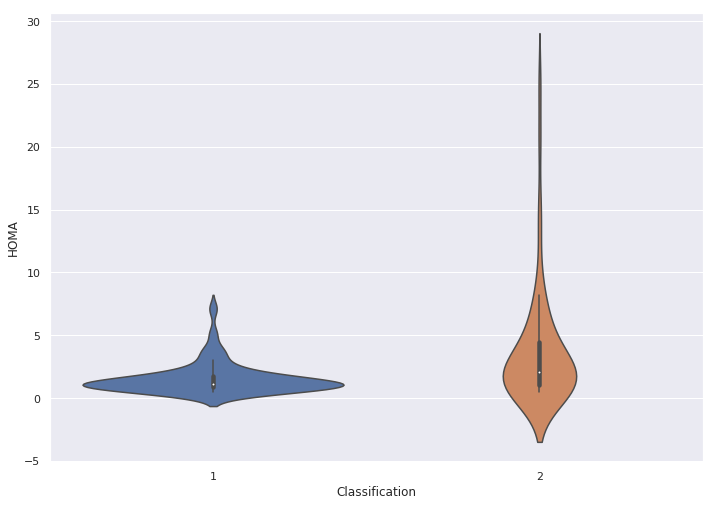

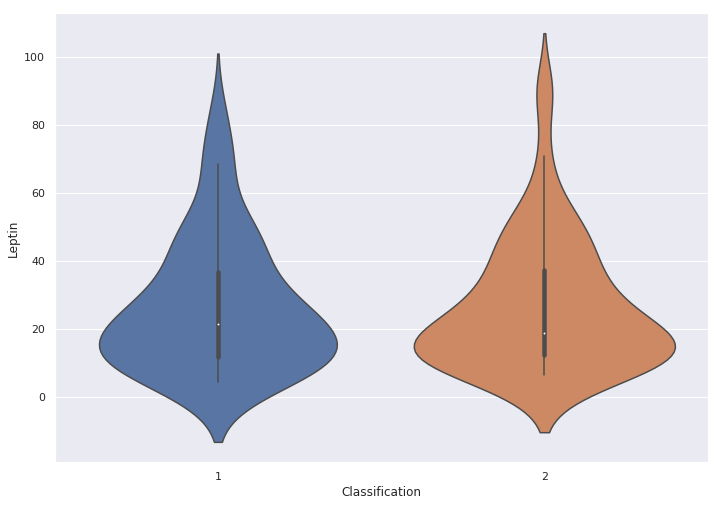

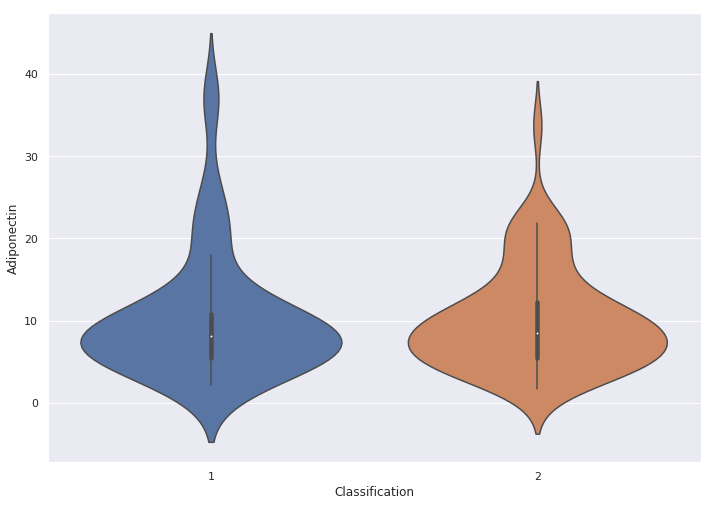

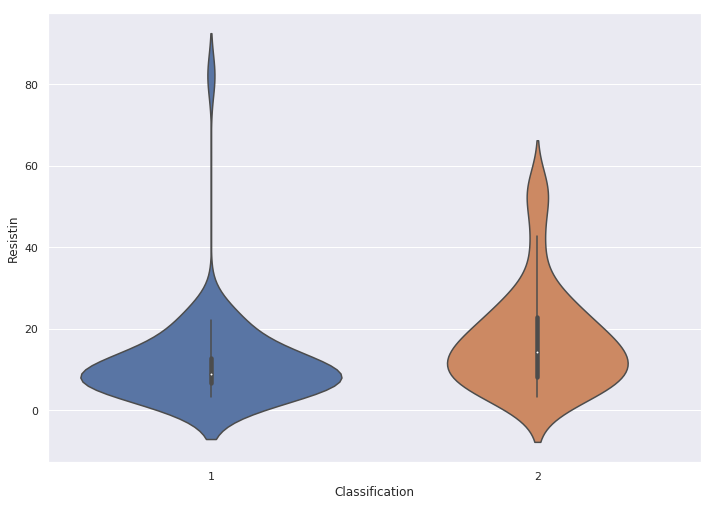

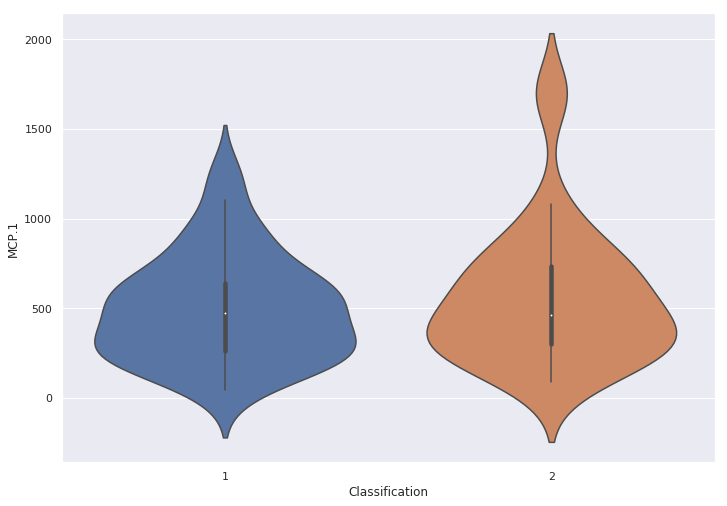

In [5]:
y = data.columns[:-1]
x = data.columns[-1]

def violin_plots(x, y, data):
    for i, col in enumerate(y):
        plt.figure(i)
        sns.set(rc={'figure.figsize':(11.7,8.27)})
        ax = sns.violinplot(x=x, y=col, data=data)
        
violin_plots(x, y, data)

Finally, let’s check if we have missing values:

In [6]:

for col in data.columns:
    print("{} : {}".format(col, data[col].isnull().sum()))

Age : 0
BMI : 0
Glucose : 0
Insulin : 0
HOMA : 0
Leptin : 0
Adiponectin : 0
Resistin : 0
MCP.1 : 0
Classification : 0


# Modelling #

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])

data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0


Now, 0 represents a healthy control, and 1 represents a patient.

Then, we split the dataset into a training and test set:


In [0]:
from sklearn.model_selection import train_test_split

y = data['Classification'].values.reshape(-1, 1)
X = data.drop('Classification', 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Before writing our models, we need to define the appropriate error metric. In this case, since it is a classification problem, we could use a confusion matrix and use the classification error. Let’s write a helper function to plot the confusion matrix:


# Confusion Matrix #

Before writing our models, we need to define the appropriate error metric. In this case, since it is a classification problem, we could use a confusion matrix and use the classification error. Let’s write a helper function to plot the confusion matrix:

In [0]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Decision Tree #

Confusion matrix, without normalization
[[6 3]
 [0 3]]


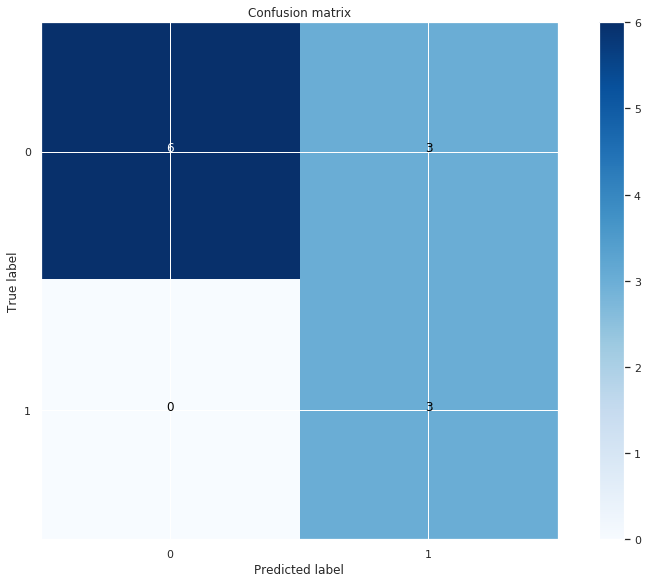

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

decision_tree_cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(decision_tree_cm, [0, 1])
plt.show()

# Bagging #
To implement a decision tree with bagging, we write the following:

Confusion matrix, without normalization
[[9 0]
 [0 3]]


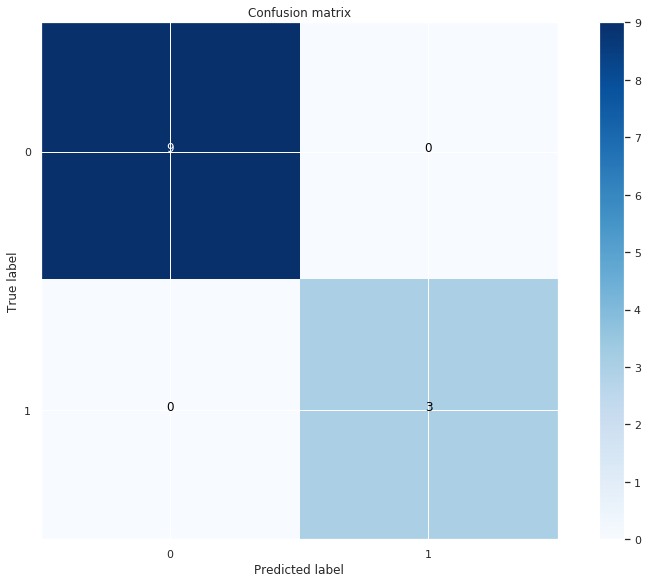

In [13]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier()

bagging_clf.fit(X_train, y_train.ravel())
y_pred_bag = bagging_clf.predict(X_test)

bag_cm = confusion_matrix(y_test, y_pred_bag)

plot_confusion_matrix(bag_cm, [0, 1])
plt.show()

# Random forest classifier #
Here, for the random forest classifier, we specify the number of trees we want. Let’s go with 100:

Confusion matrix, without normalization
[[8 1]
 [1 2]]


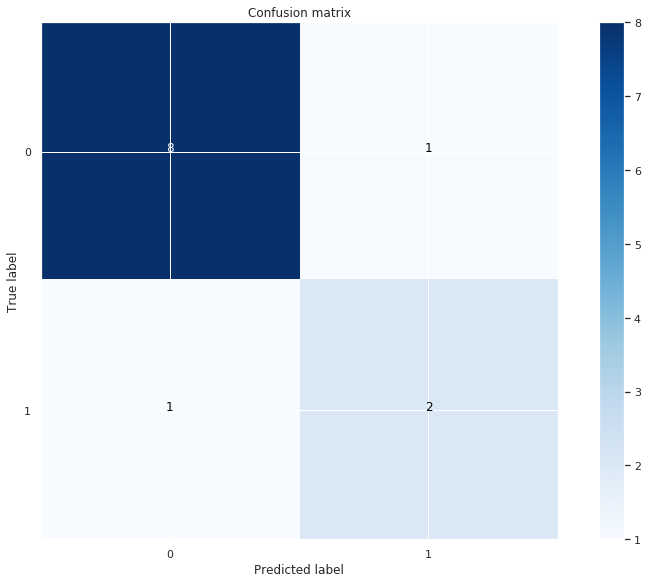

In [12]:
from sklearn.ensemble import RandomForestClassifier

random_clf = RandomForestClassifier(100)

random_clf.fit(X_train, y_train.ravel())
y_pred_random = random_clf.predict(X_test)

random_cm = confusion_matrix(y_test, y_pred_random)

plot_confusion_matrix(random_cm, [0, 1])
plt.show()

# Boosting #

Confusion matrix, without normalization
[[8 1]
 [0 3]]


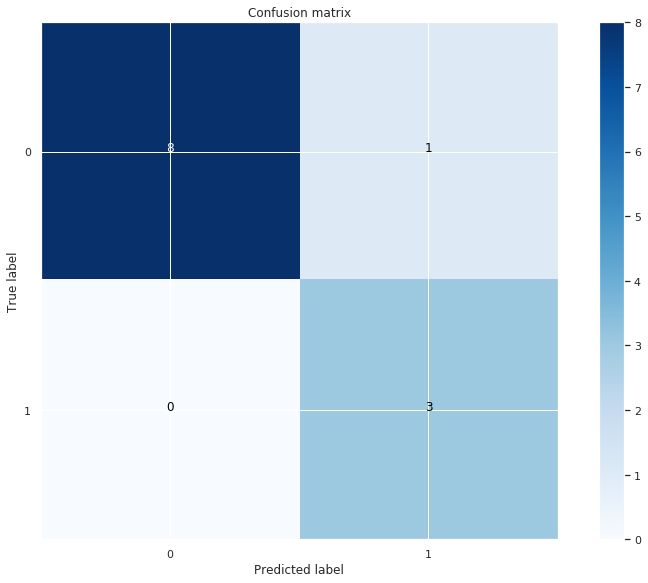

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

boost_clf = GradientBoostingClassifier()

boost_clf.fit(X_train, y_train.ravel())
y_pred_boost = boost_clf.predict(X_test)

boost_cm = confusion_matrix(y_test, y_pred_boost)

plot_confusion_matrix(boost_cm, [0, 1])
plt.show()

# Reference #

[Source](https://towardsdatascience.com/the-complete-guide-to-decision-trees-17a874301448) and [GitHub](https://github.com/marcopeix/ISL-Decision-Trees/blob/master/Decison%20Trees.ipynb)